In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd

import hdbscan
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
n_clusters = 20

In [3]:
# Generate a more readable colormap for 3D plots
colors = plt.cm.hsv(np.linspace(0, 1, n_clusters))
custom_cmap = ListedColormap(colors)

# Generate a more readable colormap for 2D plots
colors_2D = custom_cmap.colors if hasattr(custom_cmap, "colors") else plt.cm.hsv(np.linspace(0, 1, n_clusters))

In [4]:
# Load embeddings and correspondance
embeddings = np.load("embeddings/embeddings.npy", allow_pickle=True)
correspondance = np.load("embeddings/correspondance.npy", allow_pickle=True).item()

In [5]:
#Check dimension of the embeddings
print(embeddings.shape)

(49125, 2, 1, 32)


In [6]:
embeddings[0,:,0,:].shape

(2, 32)

In [7]:
embeddings[0,:,0,:]

array([[ 9.3279821e-05,  5.3878914e-04,  7.5577741e-04,  6.9409428e-04,
        -1.0087588e-03,  3.4060807e-04, -2.3140883e-05, -7.4461411e-04,
         1.4168004e-03, -5.9517624e-04,  5.5115274e-04,  4.9303524e-04,
         1.9229614e-03,  4.0151665e-04,  9.9105004e-04,  1.5749959e-03,
        -8.8462955e-04, -1.7328424e-03, -1.3210257e-03, -8.2124508e-04,
         4.4530019e-04,  1.2967292e-03,  2.2226470e-03,  1.0335374e-03,
         3.0617160e-04,  1.3589240e-03, -4.8915239e-04,  9.3701377e-04,
         1.5474946e-03,  1.9136368e-03, -3.7536531e-04, -9.1782789e-04],
       [-4.0166357e-01, -4.0122002e-01, -4.0051514e-01, -4.0154651e-01,
        -4.0105715e-01, -4.0215084e-01, -4.0181506e-01, -4.0080121e-01,
        -4.0104574e-01, -4.0182838e-01, -4.0002048e-01, -4.0144745e-01,
        -4.0366200e-01, -4.0179408e-01, -4.0198129e-01, -4.0065381e-01,
        -4.0140098e-01, -4.0246171e-01, -4.0059176e-01, -4.0229690e-01,
        -4.0189216e-01, -4.0285194e-01, -4.0102836e-01, -4.0061

In [8]:
#We select the mean embeddings
mu_embeddings = embeddings[:, 0, 0, :]
print(mu_embeddings.shape)

(49125, 32)


In [9]:
#Before doing anything, as we are going to use KMeans or UMAP, we need to scale the data

#We normalize the data
scaler = StandardScaler()
mu_embeddings_normalized = scaler.fit_transform(mu_embeddings)

In [10]:
mu_embeddings.mean(axis=0), mu_embeddings_normalized.mean(axis=0), mu_embeddings_normalized.std(axis=0)

(array([ 2.4868315e-04,  8.2420034e-04,  7.1048440e-04,  4.4633787e-05,
        -1.3414926e-03,  9.5571898e-04, -5.0043390e-04, -4.0747083e-04,
         1.7774625e-03, -2.5183675e-04,  1.1198886e-03,  9.8786142e-04,
         2.7333053e-03,  1.8497236e-04,  1.2206774e-03,  1.6525284e-03,
        -9.7690127e-04, -1.5100096e-03, -1.2845857e-03, -1.0898713e-03,
         5.4997526e-04,  1.8315399e-03,  2.2821911e-03,  5.0760200e-04,
         4.2429855e-04,  1.7716400e-03, -4.5542308e-04,  1.3223753e-03,
         1.3715638e-03,  1.9874189e-03, -6.4252107e-04, -6.8636163e-04],
       dtype=float32),
 array([-1.64286774e-07,  8.82391404e-08, -7.52140821e-08, -2.51981135e-07,
        -6.95842530e-08,  1.69186194e-08, -6.09408213e-09, -4.57423930e-08,
         1.26741611e-07, -1.22477985e-07, -3.45361144e-08,  3.35120665e-09,
         9.42669445e-08, -2.79543059e-07,  1.25724853e-08,  3.02903231e-07,
        -3.63743027e-07,  7.87106131e-08, -8.98589292e-09, -4.17869508e-08,
         9.90049855e

There are many dimensions where the std (normalized) and mean (not_nromalized) are 0

# 1.Presentation of the approach

We are going to use two approaches and two different algorithms : first doing clustering an then dimension reduction or the opposite

# 2.First approach: cultering after dim reduction

As we have 128 dimensions, to avoid curse of dimensionality, we decide first to the number of dimensions and then to apply the culstering algorithm. We choose to keep 3 dimensions to be able to watch the data and to keep more information than in 2 dimensions

## 2.1 Dim reduction: UMAP

## Preparation of UMAP reduction (mandatory run)

We start to reduce dimension with UMAP

UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)
Thu Nov 21 03:39:26 2024 Construct fuzzy simplicial set
Thu Nov 21 03:39:26 2024 Finding Nearest Neighbors
Thu Nov 21 03:39:26 2024 Building RP forest with 16 trees


c:\Users\antoi\anaconda3\envs\GDA\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Thu Nov 21 03:39:26 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 21 03:39:28 2024 Finished Nearest Neighbor Search
Thu Nov 21 03:39:28 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 21 03:40:02 2024 Finished embedding


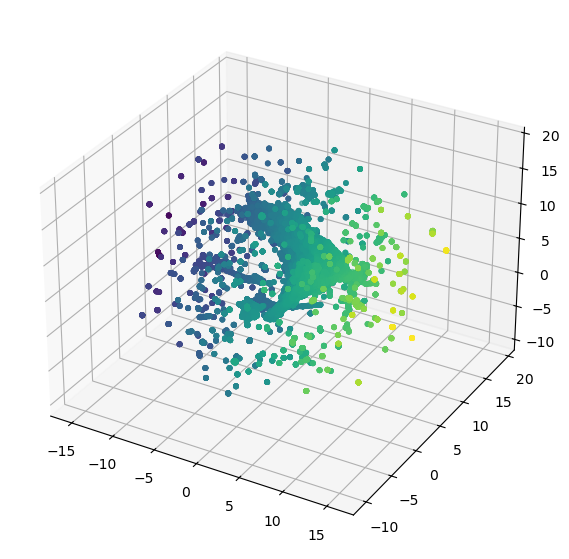

In [71]:
# Reduction of dimension with UMAP
reducer = UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42, verbose=True)
projection = reducer.fit_transform(mu_embeddings_normalized)

#Vizualizaition of the UMAP space (3D)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c=projection[:, 0], cmap='viridis', s=10)

## Applciation of Kmeans on reduced space

In [72]:
#We appy the Kmeans on the reduced space
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(projection)
centroids_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

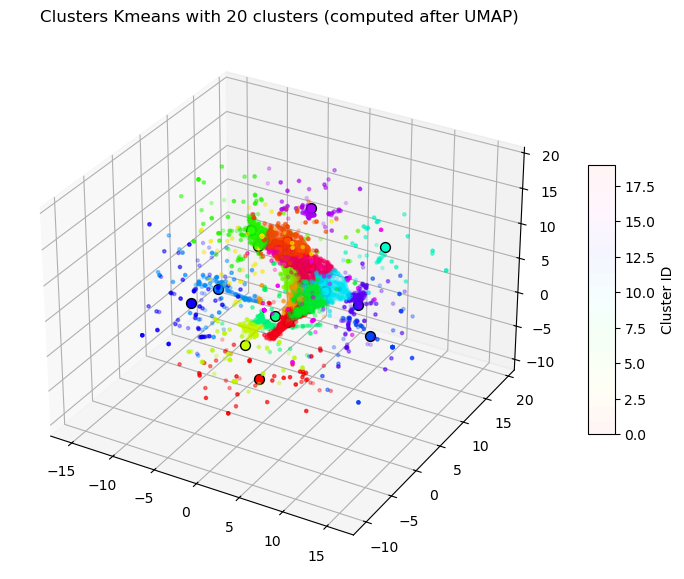

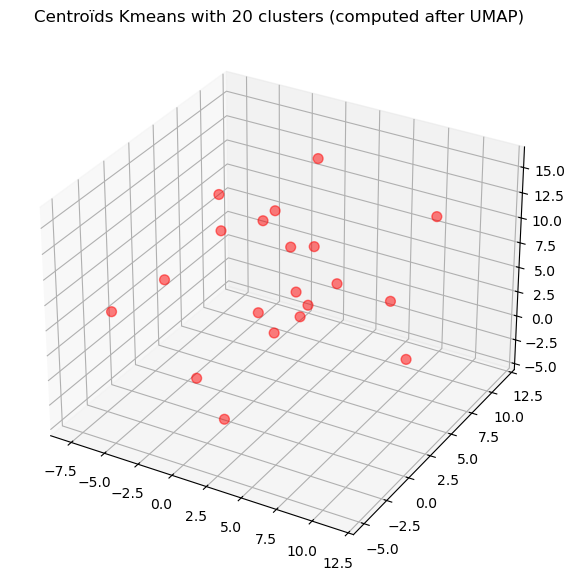

In [73]:
#We plot the results


# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_clusters  = ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c=labels_kmeans, s=5, cmap=custom_cmap, alpha = 0.04)
#scatter_clusters  = ax.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], centroids_kmeans[:, 2], c='black', s=50, alpha=1) #If we want centroïds to be black
for i in range(n_clusters):
    ax.scatter(centroids_kmeans[i, 0], centroids_kmeans[i, 1], centroids_kmeans[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed after UMAP)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], centroids_kmeans[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed after UMAP)")
plt.show()


In [74]:
# Silhouette Score
silhouette_avg = silhouette_score(projection, labels_kmeans)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.31446627


## Application of UMAP in 2D (mandatory)

UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Nov 21 03:40:33 2024 Construct fuzzy simplicial set
Thu Nov 21 03:40:33 2024 Finding Nearest Neighbors
Thu Nov 21 03:40:33 2024 Building RP forest with 16 trees


c:\Users\antoi\anaconda3\envs\GDA\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Thu Nov 21 03:40:34 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 21 03:40:35 2024 Finished Nearest Neighbor Search
Thu Nov 21 03:40:36 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 21 03:41:09 2024 Finished embedding


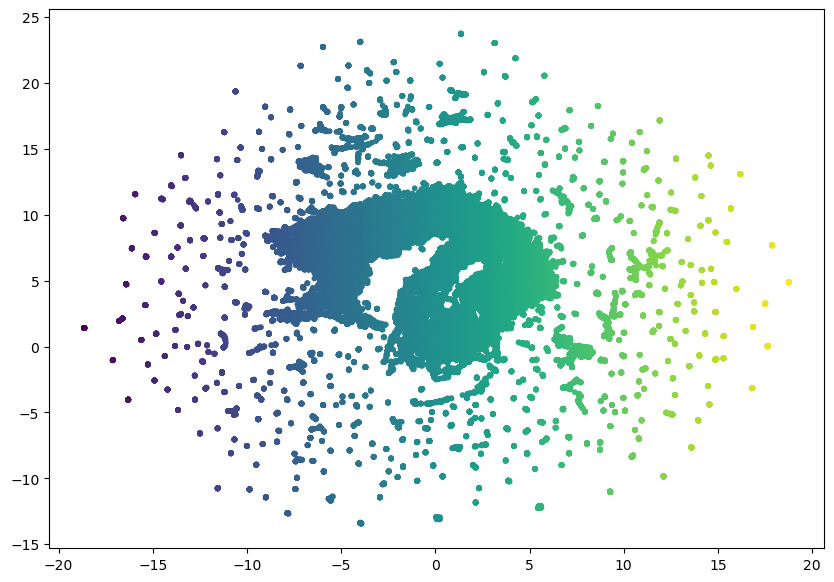

In [75]:
# Reduction of dimension with UMAP in 2D
reducer_2D = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, verbose=True)
projection_2D = reducer_2D.fit_transform(mu_embeddings_normalized)

#Vizualizaition of the UMAP space (2D)
fig = plt.figure(figsize=(10, 7))
plt.scatter(projection_2D[:, 0], projection_2D[:, 1], c=projection_2D[:, 0], cmap='viridis', s=10)

## 2.2 Dim reduction PCA

## Reduction of dimension PCA (3D), mandatory

We also try to reduce dimension with PCA (linear so maybe the distance in the "PCA" space is more meaninful than in UMAP space?)

In [76]:
#We compute the PCA of the embeddings
pca = PCA(n_components=3)
pca_projection = pca.fit_transform(mu_embeddings_normalized)


## Application of Kmeans after PCA (3D)

In [77]:
#We appy the Kmeans on the reduced space after PCA
kmeans_PCA = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_PCA.fit(pca_projection)

centroids_kmeans_PCA  = kmeans_PCA.cluster_centers_
labels_kmeans_PCA  = kmeans_PCA.labels_

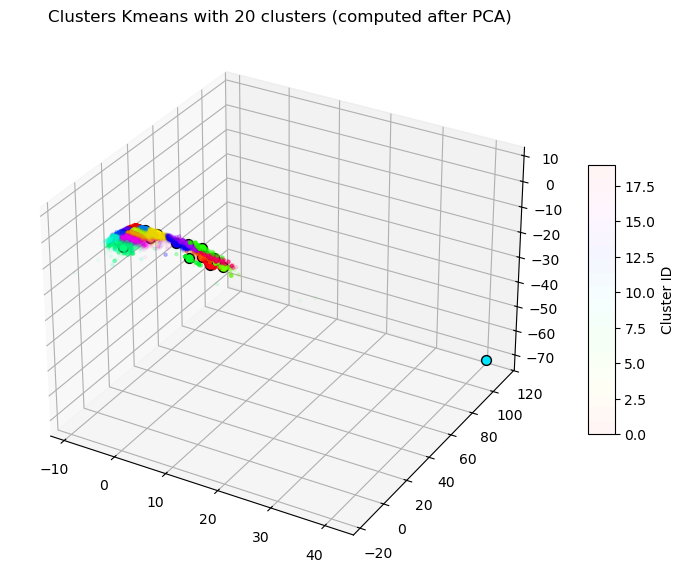

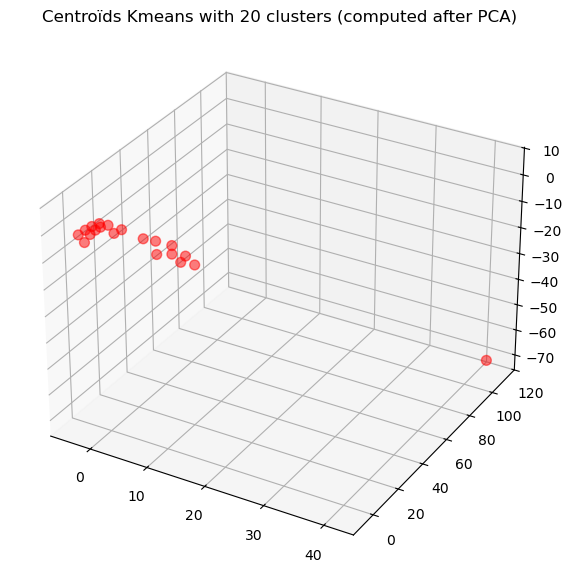

In [78]:
#We plot the results
# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_clusters  = ax.scatter(pca_projection[:, 0], pca_projection[:, 1], pca_projection[:, 2], c=labels_kmeans_PCA, s=5, cmap=custom_cmap, alpha = 0.04)
#scatter_clusters  = ax.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], centroids_kmeans[:, 2], c='black', s=50, alpha=1) #If we want centroïds to be black
for i in range(n_clusters):
    ax.scatter(centroids_kmeans_PCA[i, 0], centroids_kmeans_PCA[i, 1], centroids_kmeans_PCA[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed after PCA)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centroids_kmeans_PCA[:, 0], centroids_kmeans_PCA[:, 1], centroids_kmeans_PCA[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed after PCA)")
plt.show()


In [79]:
# Silhouette Score
silhouette_avg = silhouette_score(pca_projection, labels_kmeans_PCA)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.30934665


# 2 Second approach: clustering before reduction of dimension

## 2.1 We apply K_means on the whole dataset

In [80]:
#We appy the Kmeans on the whole dataset
kmeans_before = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_before.fit(mu_embeddings_normalized)
centroids_kmeans_before = kmeans_before.cluster_centers_
labels_kmeans_before = kmeans_before.labels_

In [81]:
# Silhouette Score
silhouette_avg = silhouette_score(mu_embeddings_normalized, labels_kmeans_before)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.23090132


## 2.2 Projection in previous UMAP (3D) space to see results

In [82]:
#Project the centroids in the UMAP space
centroids_kmeans_before_projected = reducer.transform(centroids_kmeans_before)

Thu Nov 21 03:42:13 2024 Worst tree score: 0.85508397
Thu Nov 21 03:42:13 2024 Mean tree score: 0.86060560
Thu Nov 21 03:42:13 2024 Best tree score: 0.87554198
Thu Nov 21 03:42:13 2024 Forward diversification reduced edges from 736875 to 355827
Thu Nov 21 03:42:13 2024 Reverse diversification reduced edges from 355827 to 355827
Thu Nov 21 03:42:14 2024 Degree pruning reduced edges from 387234 to 386855
Thu Nov 21 03:42:14 2024 Resorting data and graph based on tree order
Thu Nov 21 03:42:14 2024 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


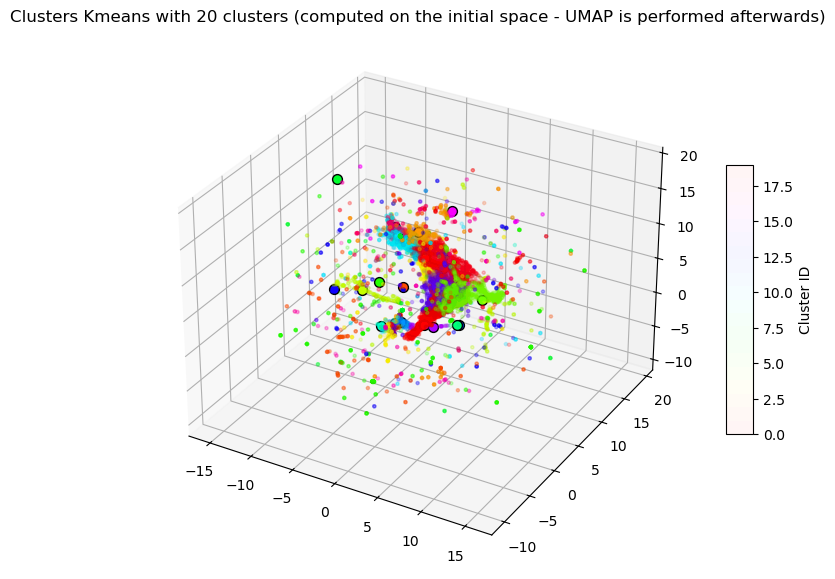

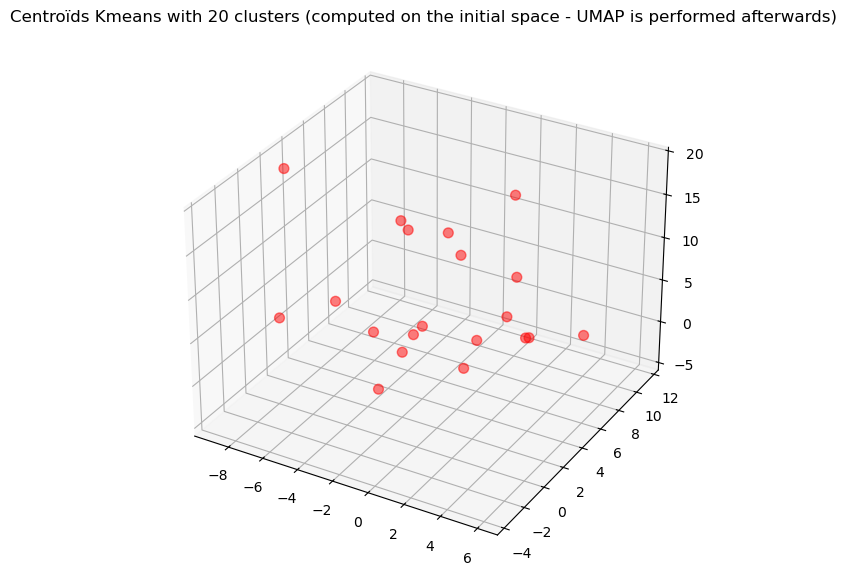

In [83]:
#We plot the results

# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_clusters  = ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c=labels_kmeans_before, s=5, cmap=custom_cmap, alpha = 0.04)
for i in range(n_clusters):
    ax.scatter(centroids_kmeans_before_projected[i, 0], centroids_kmeans_before_projected[i, 1], centroids_kmeans_before_projected[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centroids_kmeans_before_projected[:, 0], centroids_kmeans_before_projected[:, 1], centroids_kmeans_before_projected[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")
plt.show()


## 2.3 Projection with PCA to see results

## PCA 3D

In [84]:
#Project the centroids in the PCA space
centroids_kmeans_before_projected = pca.transform(centroids_kmeans_before)

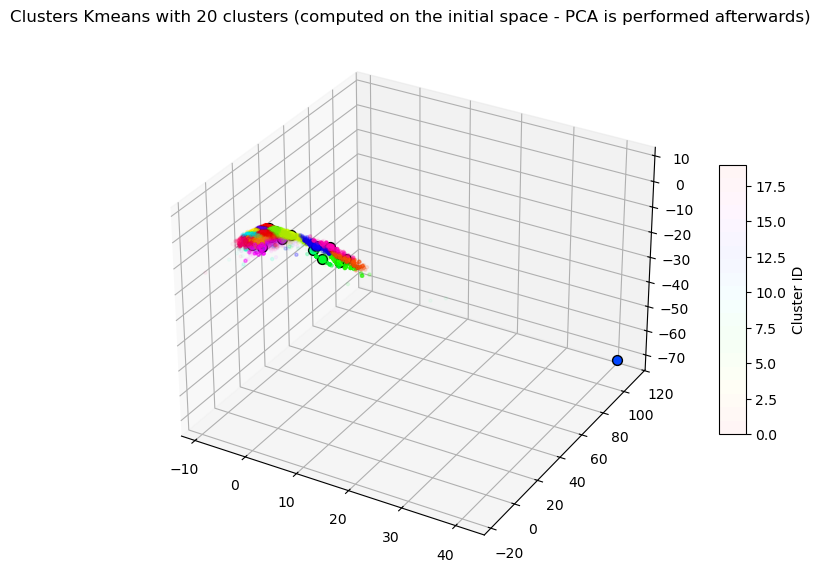

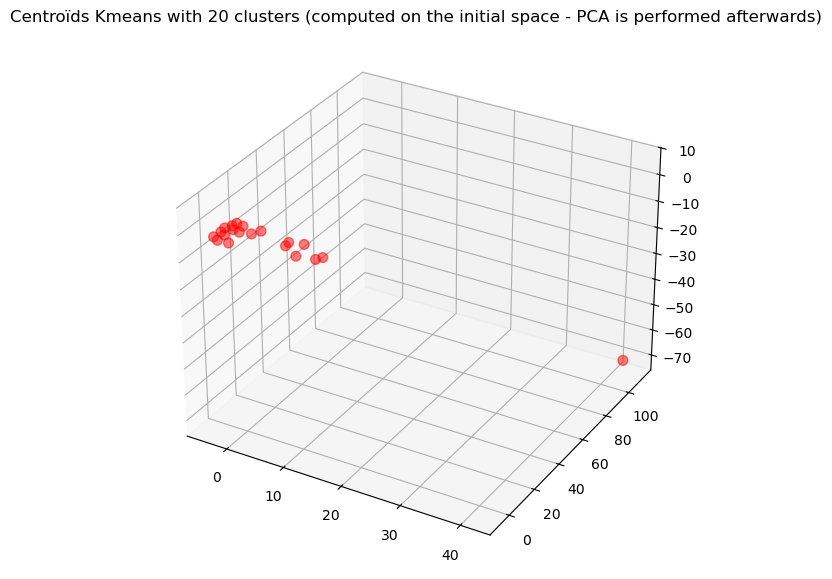

In [85]:
#We plot the results
# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_clusters  = ax.scatter(pca_projection[:, 0], pca_projection[:, 1], pca_projection[:, 2], c=labels_kmeans_before, s=5, cmap=custom_cmap, alpha = 0.04)
for i in range(n_clusters):
    ax.scatter(centroids_kmeans_before_projected[i, 0], centroids_kmeans_before_projected[i, 1], centroids_kmeans_before_projected[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - PCA is performed afterwards)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centroids_kmeans_before_projected[:, 0], centroids_kmeans_before_projected[:, 1], centroids_kmeans_before_projected[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - PCA is performed afterwards)")
plt.show()

## PCA 2D

In [86]:
#PCA 2D
pca_2d = PCA(n_components=2)
pca_projection_2d = pca_2d.fit_transform(mu_embeddings_normalized)

In [87]:
#Project the centroids in the PCA space
centroids_kmeans_2d = pca_2d.transform(centroids_kmeans_before)

In [88]:
print(len(pca_projection_2d[:,0]))
len(labels_kmeans_before)

49125


49125

C:\Users\antoi\AppData\Local\Temp\ipykernel_18008\4034222332.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids_kmeans_2d[i, 0], centroids_kmeans_2d[i, 1],


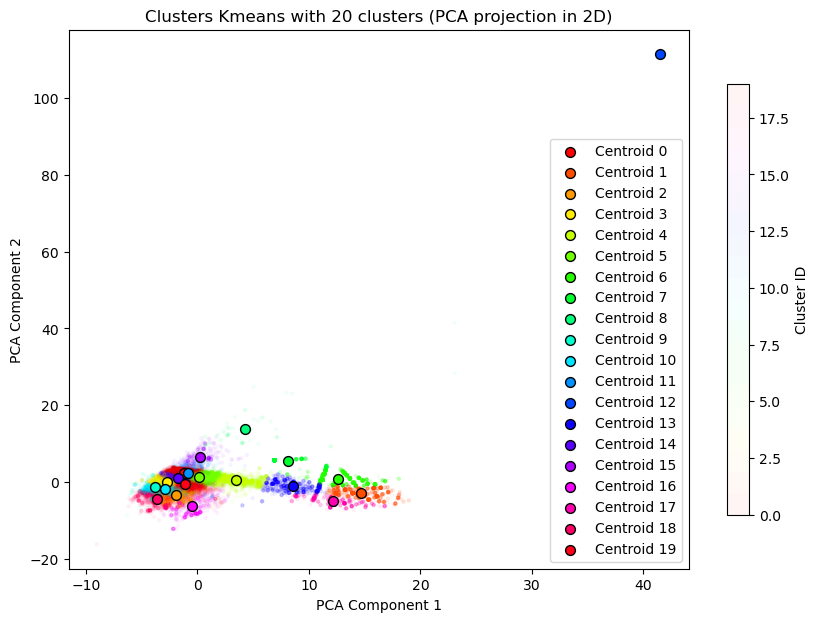

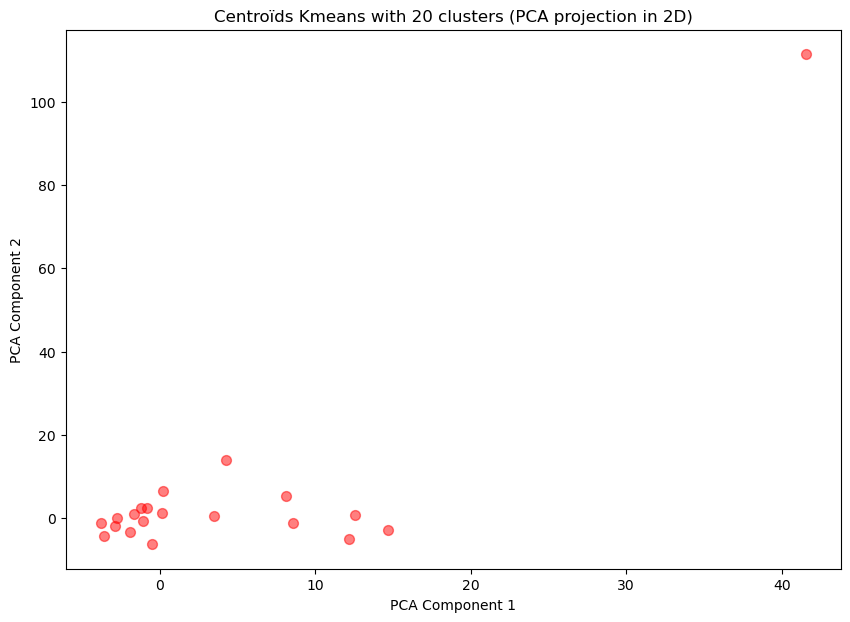

In [89]:
# Nuages de points des clusters
fig, ax = plt.subplots(figsize=(10, 7))
scatter_clusters_2d = ax.scatter(pca_projection_2d[:, 0], pca_projection_2d[:, 1],
                                 c=labels_kmeans_before, s=5, cmap=custom_cmap, alpha=0.04)

# Ajouter les centroïdes
for i in range(n_clusters):
    ax.scatter(centroids_kmeans_2d[i, 0], centroids_kmeans_2d[i, 1],
               c=colors_2D[i], s=50, edgecolor='black', label=f'Centroid {i}')

# Ajouter une barre de couleurs
cbar = plt.colorbar(scatter_clusters_2d, ax=ax, shrink=0.8, aspect=20)
cbar.set_label("Cluster ID")

# Titre et légende
plt.title(f"Clusters Kmeans with {n_clusters} clusters (PCA projection in 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Visualisation des centroïdes seuls dans l'espace 2D
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(centroids_kmeans_2d[:, 0], centroids_kmeans_2d[:, 1], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (PCA projection in 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# We want to look quickly to see whether or not we have curse of dimensionality

## We check the histogram of euclidian distances in the original latent space

Shape des données : (49125, 32)


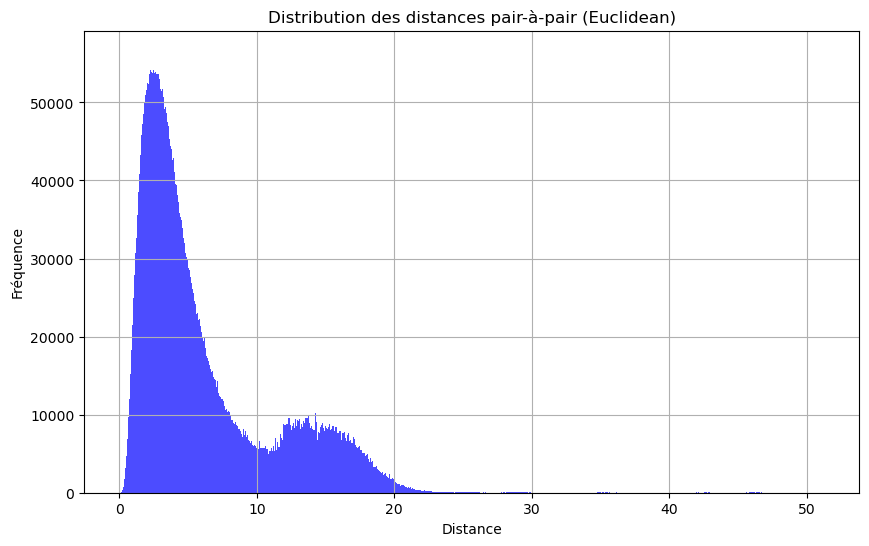

Moyenne des distances : 6.2151
Écart type des distances : 5.0047


In [90]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {mu_embeddings_normalized.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 1000 points pour le calcul des distances
if mu_embeddings_normalized.shape[0] > sample_size:
    indices = np.random.choice(mu_embeddings_normalized.shape[0], size=sample_size, replace=False)
    sampled_data = mu_embeddings_normalized[indices]
else:
    sampled_data = mu_embeddings_normalized

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')

# Étape 4 : Visualiser la distribution des distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des distances pair-à-pair (Euclidean)")
plt.xlabel("Distance")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 5 : Vérifier l'écart type et la moyenne
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print(f"Moyenne des distances : {mean_distance:.4f}")
print(f"Écart type des distances : {std_distance:.4f}")


In [91]:
# Moyenne et écart-type
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Coefficient de variation (CV)
cv = (std_distance / mean_distance) * 100

# Pourcentage dans ±1σ
lower_bound = mean_distance - std_distance
upper_bound = mean_distance + std_distance
percent_within_1std = np.sum((distances >= lower_bound) & (distances <= upper_bound)) / len(distances) * 100

# Résultats
print(f"Moyenne des distances : {mean_distance:.4f}")
print(f"Écart type des distances : {std_distance:.4f}")
print(f"Coefficient de variation : {cv:.2f}%")
print(f"Pourcentage de distances dans ±1σ : {percent_within_1std:.2f}%")

Moyenne des distances : 6.2151
Écart type des distances : 5.0047
Coefficient de variation : 80.52%
Pourcentage de distances dans ±1σ : 77.02%


Shape des données : (49125, 32)


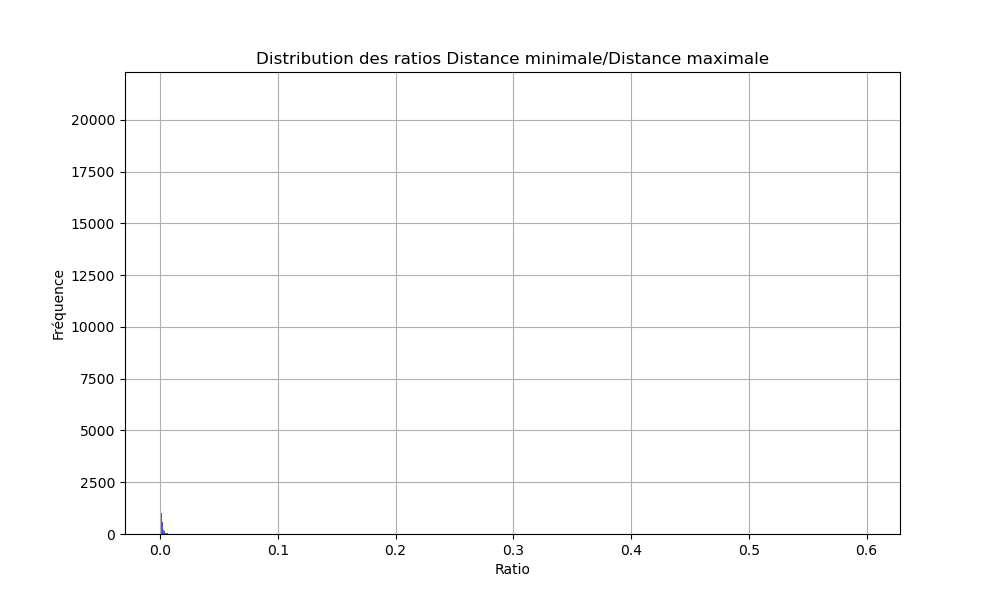

Moyenne des ratios : 0.0011
Écart type des ratios : 0.0034
Proportion des ratios proches de 1 (>0.9) : 0.00%


In [16]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {mu_embeddings_normalized.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000000000  # Limiter à 10000 points pour le calcul des distances
if mu_embeddings_normalized.shape[0] > sample_size:
    indices = np.random.choice(mu_embeddings_normalized.shape[0], size=sample_size, replace=False)
    sampled_data = mu_embeddings_normalized[indices]
else:
    sampled_data = mu_embeddings_normalized

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')
distance_matrix = squareform(distances)  # Convertir en matrice carrée

# Étape 4 : Calcul des ratios pour chaque point
ratios = []
for i in range(distance_matrix.shape[0]):
    distances_to_point = distance_matrix[i, :]  # Toutes les distances pour le point i
    distances_to_point = np.delete(distances_to_point, i)  # Supprimer la distance à soi-même (toujours 0)
    min_dist = np.min(distances_to_point)
    max_dist = np.max(distances_to_point)
    ratio = min_dist / max_dist
    ratios.append(ratio)

# Étape 5 : Analyse des ratios
ratios = np.array(ratios)

# Visualiser les ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des ratios Distance minimale/Distance maximale")
plt.xlabel("Ratio")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 6 : Statistiques sur les ratios
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
high_ratios = np.mean(ratios > 0.9)

print(f"Moyenne des ratios : {mean_ratio:.4f}")
print(f"Écart type des ratios : {std_ratio:.4f}")
print(f"Proportion des ratios proches de 1 (>0.9) : {high_ratios:.2%}")


Shape des données : (49125, 32)


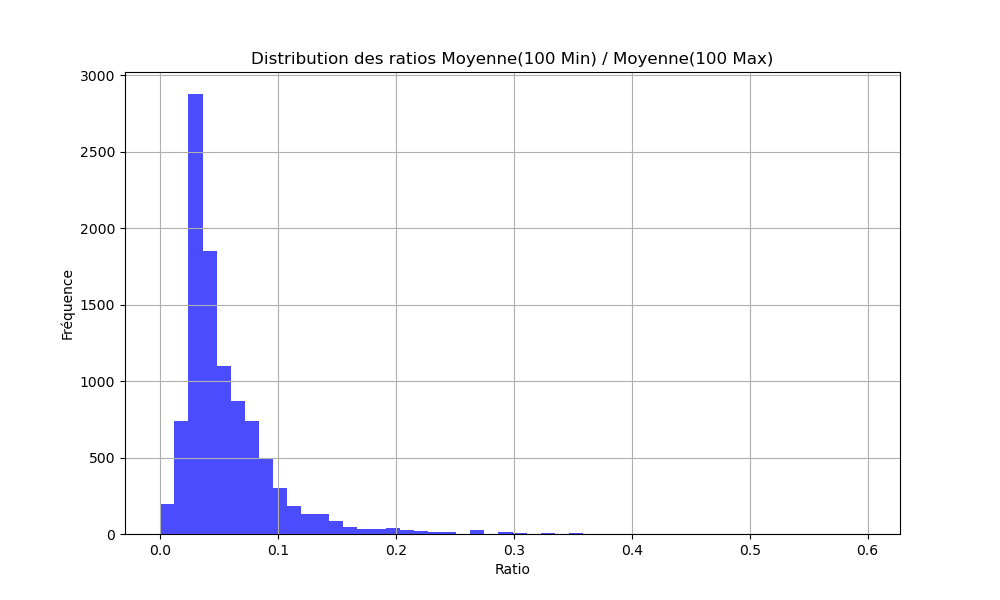

Moyenne des ratios Moyenne(100 Min) / Moyenne(100 Max) : 0.0561
Écart type des ratios : 0.0434
Proportion des ratios proches de 1 (>0.9) : 0.00%


In [19]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Générer ou charger les données (par exemple 128 dimensions)
# Supposons que `mu_embeddings_normalized` est ton tableau de données (N, 128)
print(f"Shape des données : {mu_embeddings_normalized.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 10 000 points pour le calcul des distances
if mu_embeddings_normalized.shape[0] > sample_size:
    indices = np.random.choice(mu_embeddings_normalized.shape[0], size=sample_size, replace=False)
    sampled_data = mu_embeddings_normalized[indices]
else:
    sampled_data = mu_embeddings_normalized

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')
distance_matrix = squareform(distances)  # Convertir en matrice carrée

# Étape 4 : Calcul des 100 distances min et max pour chaque point
min_max_ratios = []
for i in range(distance_matrix.shape[0]):
    distances_to_point = distance_matrix[i, :]  # Toutes les distances pour le point i
    distances_to_point = np.delete(distances_to_point, i)  # Supprimer la distance à soi-même (toujours 0)
    
    # Trier les distances
    sorted_distances = np.sort(distances_to_point)
    
    # Extraire les 100 plus petites et 100 plus grandes distances
    hundred_min = sorted_distances[:100]
    hundred_max = sorted_distances[-100:]
    
    # Calcul du ratio moyen des 100 min / 100 max
    min_max_ratio = np.mean(hundred_min) / np.mean(hundred_max)
    min_max_ratios.append(min_max_ratio)

# Étape 5 : Analyse des ratios
min_max_ratios = np.array(min_max_ratios)

# Visualiser les ratios
plt.figure(figsize=(10, 6))
plt.hist(min_max_ratios, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des ratios Moyenne(100 Min) / Moyenne(100 Max)")
plt.xlabel("Ratio")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 6 : Statistiques sur les ratios
mean_min_max_ratio = np.mean(min_max_ratios)
std_min_max_ratio = np.std(min_max_ratios)
high_ratios_proportion = np.mean(min_max_ratios > 0.9)

print(f"Moyenne des ratios Moyenne(100 Min) / Moyenne(100 Max) : {mean_min_max_ratio:.4f}")
print(f"Écart type des ratios : {std_min_max_ratio:.4f}")
print(f"Proportion des ratios proches de 1 (>0.9) : {high_ratios_proportion:.2%}")



Shape des données : (49125, 32)


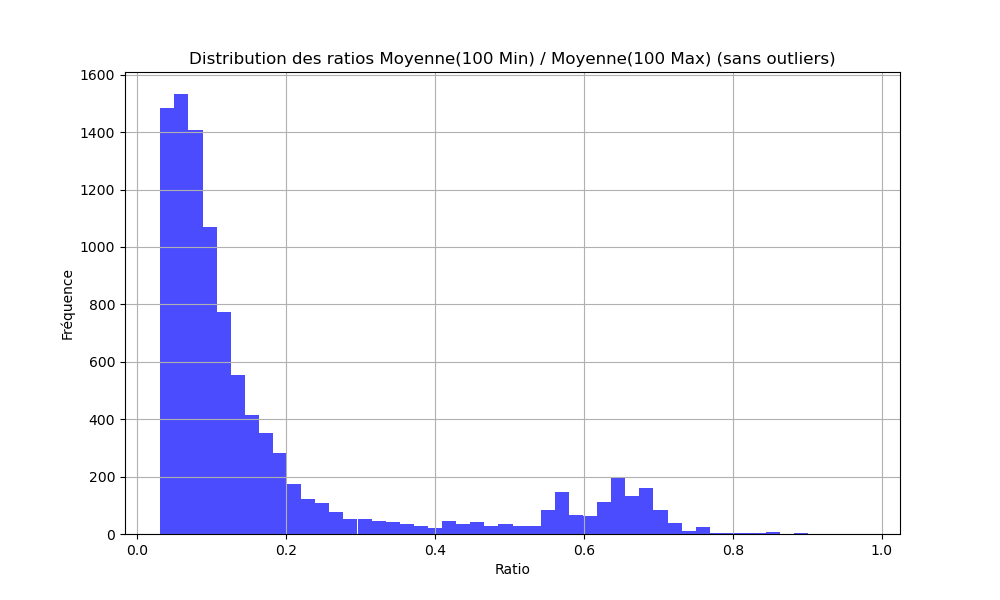

Moyenne des ratios Moyenne(100 Min) / Moyenne(100 Max) (sans outliers) : 0.1762
Écart type des ratios : 0.1884
Proportion des ratios proches de 1 (>0.9) : 0.02%


In [21]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Charger les données (128 dimensions)
print(f"Shape des données : {mu_embeddings_normalized.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 10 000 points pour le calcul des distances
if mu_embeddings_normalized.shape[0] > sample_size:
    indices = np.random.choice(mu_embeddings_normalized.shape[0], size=sample_size, replace=False)
    sampled_data = mu_embeddings_normalized[indices]
else:
    sampled_data = mu_embeddings_normalized

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')
distance_matrix = squareform(distances)  # Convertir en matrice carrée

# Étape 4 : Calcul des 100 distances min et max pour chaque point (avec gestion des outliers)
min_max_ratios = []
for i in range(distance_matrix.shape[0]):
    distances_to_point = distance_matrix[i, :]  # Toutes les distances pour le point i
    distances_to_point = np.delete(distances_to_point, i)  # Supprimer la distance à soi-même (toujours 0)
    
    # Détecter et retirer les outliers
    Q1 = np.percentile(distances_to_point, 25)
    Q3 = np.percentile(distances_to_point, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    distances_filtered = distances_to_point[(distances_to_point >= lower_bound) & (distances_to_point <= upper_bound)]
    
    # Trier les distances filtrées
    sorted_distances = np.sort(distances_filtered)
    
    # Extraire les 100 plus petites et 100 plus grandes distances
    if len(sorted_distances) >= 100:
        hundred_min = sorted_distances[:100]
        hundred_max = sorted_distances[-100:]
    else:
        # Si moins de 100 distances après filtrage, prendre tout ce qui reste
        hundred_min = sorted_distances[:len(sorted_distances) // 2]
        hundred_max = sorted_distances[len(sorted_distances) // 2:]
    
    # Calcul du ratio moyen des 100 min / 100 max
    if len(hundred_max) > 0:  # Éviter les divisions par zéro
        min_max_ratio = np.mean(hundred_min) / np.mean(hundred_max)
        min_max_ratios.append(min_max_ratio)

# Étape 5 : Analyse des ratios
min_max_ratios = np.array(min_max_ratios)

# Visualiser les ratios
plt.figure(figsize=(10, 6))
plt.hist(min_max_ratios, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des ratios Moyenne(100 Min) / Moyenne(100 Max) (sans outliers)")
plt.xlabel("Ratio")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 6 : Statistiques sur les ratios
mean_min_max_ratio = np.mean(min_max_ratios)
std_min_max_ratio = np.std(min_max_ratios)
high_ratios_proportion = np.mean(min_max_ratios > 0.9)

print(f"Moyenne des ratios Moyenne(100 Min) / Moyenne(100 Max) (sans outliers) : {mean_min_max_ratio:.4f}")
print(f"Écart type des ratios : {std_min_max_ratio:.4f}")
print(f"Proportion des ratios proches de 1 (>0.9) : {high_ratios_proportion:.2%}")



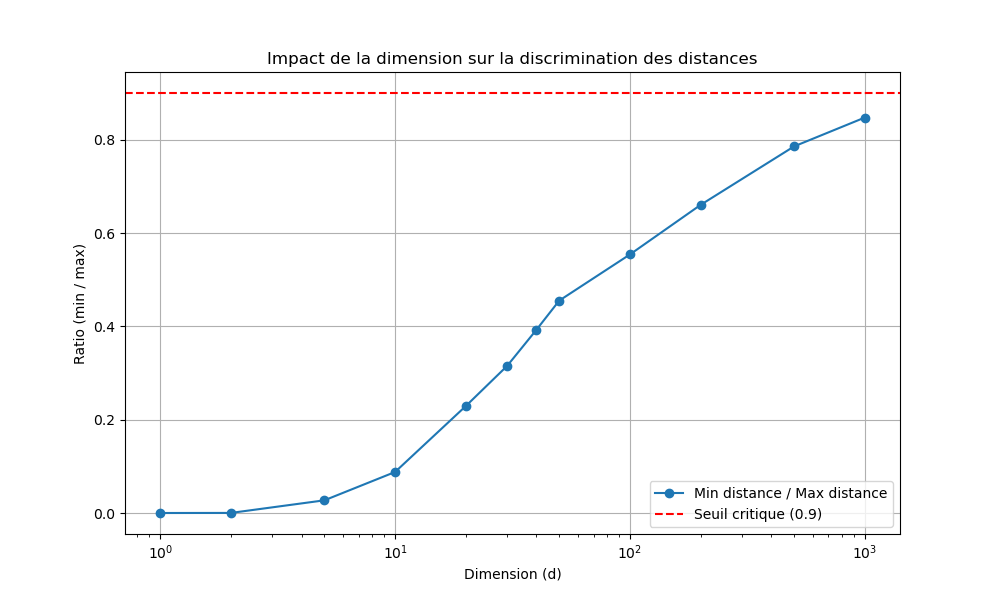

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Paramètres
n_points = 1000  # Nombre de points
dims = [1, 2, 5, 10, 20, 30,40, 50, 100, 200, 500, 1000]  # Dimensions à tester

# Stocker les résultats
ratios = []

for d in dims:
    # Générer des points uniformes dans [0, 1]^d
    data = np.random.rand(n_points, d)
    
    # Calculer les distances pair-à-pair
    distances = pdist(data, metric='euclidean')
    
    # Calculer min et max des distances
    min_dist = np.min(distances)
    max_dist = np.max(distances)
    
    # Ratio entre max et min
    ratio = min_dist / max_dist
    ratios.append(ratio)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(dims, ratios, marker='o', label="Min distance / Max distance")
plt.axhline(0.9, color='red', linestyle='--', label="Seuil critique (0.9)")
plt.title("Impact de la dimension sur la discrimination des distances")
plt.xlabel("Dimension (d)")
plt.ylabel("Ratio (min / max)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

Dataset généré avec 10000 points dans 128 dimensions.
Shape des données : (10000, 128)


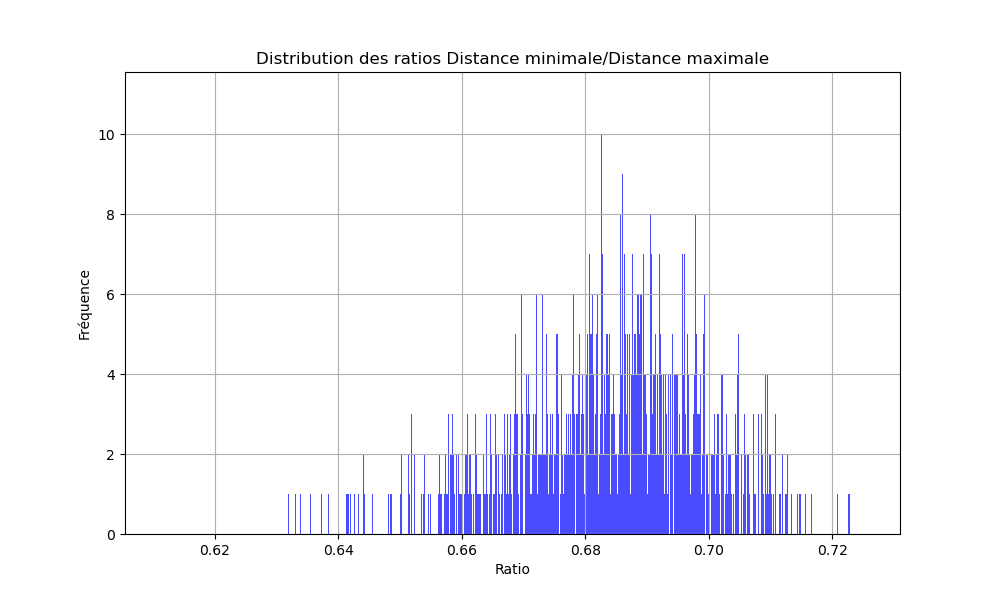

Moyenne des ratios : 0.6843
Écart type des ratios : 0.0154
Proportion des ratios proches de 1 (>0.9) : 0.00%


In [13]:
#test
import numpy as np

# Générer un jeu de données avec un grand nombre de dimensions
def generate_high_dimensional_data(n_samples=10000, n_features=128):
    """
    Génère un dataset dans un espace de grande dimension
    pour illustrer la malédiction de la dimensionnalité.
    
    Paramètres :
    - n_samples : Nombre de points
    - n_features : Nombre de dimensions (haute dimension)
    
    Retourne :
    - Un tableau numpy de forme (n_samples, n_features)
    """
    # Générer des points aléatoires uniformément distribués dans [0, 1]^n_features
    data = np.random.uniform(0, 1, size=(n_samples, n_features))
    return data

# Exemple : Créer un dataset avec 10 000 points dans un espace de 128 dimensions
n_samples = 10000
n_features = 128
high_dim_data = generate_high_dimensional_data(n_samples, n_features)

print(f"Dataset généré avec {n_samples} points dans {n_features} dimensions.")

# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {high_dim_data.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 10000 points pour le calcul des distances
if high_dim_data.shape[0] > sample_size:
    indices = np.random.choice(high_dim_data.shape[0], size=sample_size, replace=False)
    sampled_data = high_dim_data[indices]
else:
    sampled_data = high_dim_data

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')
distance_matrix = squareform(distances)  # Convertir en matrice carrée

# Étape 4 : Calcul des ratios pour chaque point
ratios = []
for i in range(distance_matrix.shape[0]):
    distances_to_point = distance_matrix[i, :]  # Toutes les distances pour le point i
    distances_to_point = np.delete(distances_to_point, i)  # Supprimer la distance à soi-même (toujours 0)
    min_dist = np.min(distances_to_point)
    max_dist = np.max(distances_to_point)
    ratio = min_dist / max_dist
    ratios.append(ratio)

# Étape 5 : Analyse des ratios
ratios = np.array(ratios)

# Visualiser les ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des ratios Distance minimale/Distance maximale")
plt.xlabel("Ratio")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 6 : Statistiques sur les ratios
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
high_ratios = np.mean(ratios > 0.9)

print(f"Moyenne des ratios : {mean_ratio:.4f}")
print(f"Écart type des ratios : {std_ratio:.4f}")
print(f"Proportion des ratios proches de 1 (>0.9) : {high_ratios:.2%}")


In [14]:
low_dim_data = generate_high_dimensional_data(n_samples=1000, n_features=2)



Shape des données : (1000, 2)


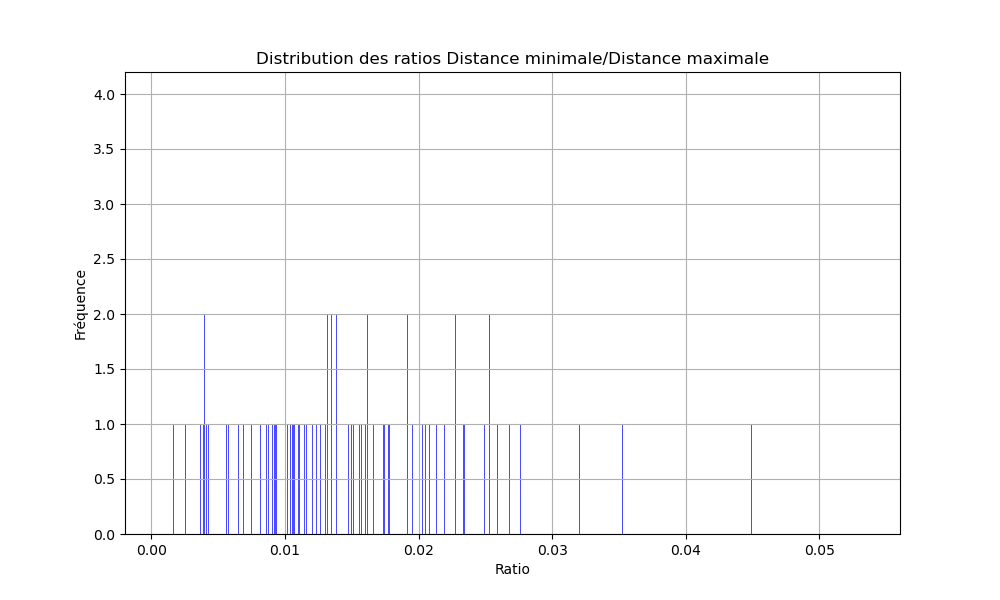

Moyenne des ratios : 0.0158
Écart type des ratios : 0.0085
Proportion des ratios proches de 1 (>0.9) : 0.00%


In [15]:
# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {low_dim_data.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 10000 points pour le calcul des distances
if low_dim_data.shape[0] > sample_size:
    indices = np.random.choice(low_dim_data.shape[0], size=sample_size, replace=False)
    sampled_data = low_dim_data[indices]
else:
    sampled_data = low_dim_data

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')
distance_matrix = squareform(distances)  # Convertir en matrice carrée

# Étape 4 : Calcul des ratios pour chaque point
ratios = []
for i in range(distance_matrix.shape[0]):
    distances_to_point = distance_matrix[i, :]  # Toutes les distances pour le point i
    distances_to_point = np.delete(distances_to_point, i)  # Supprimer la distance à soi-même (toujours 0)
    min_dist = np.min(distances_to_point)
    max_dist = np.max(distances_to_point)
    ratio = min_dist / max_dist
    ratios.append(ratio)

# Étape 5 : Analyse des ratios
ratios = np.array(ratios)

# Visualiser les ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des ratios Distance minimale/Distance maximale")
plt.xlabel("Ratio")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 6 : Statistiques sur les ratios
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
high_ratios = np.mean(ratios > 0.9)

print(f"Moyenne des ratios : {mean_ratio:.4f}")
print(f"Écart type des ratios : {std_ratio:.4f}")
print(f"Proportion des ratios proches de 1 (>0.9) : {high_ratios:.2%}")

## We check the histogram of euclidian distances after PCA (and the importance of each PCA component)

Shape des données : (49125, 3)


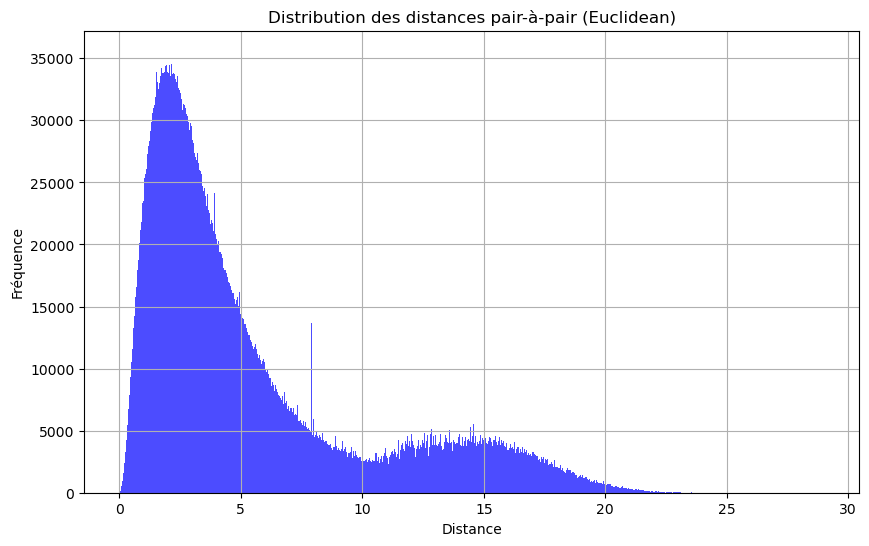

Moyenne des distances : 5.4795
Écart type des distances : 4.7799
Valeurs propres : [1.9438568e+01 5.3510542e+00 3.1799791e+00 1.8773905e+00 1.2091932e+00
 4.7054496e-01 1.5760969e-01 9.7576104e-02 5.9169587e-02 4.9634285e-02
 4.0866118e-02 2.0991486e-02 1.9787140e-02 1.0023263e-02 8.3438782e-03
 3.5173916e-03 1.8676898e-03 1.5134149e-03 9.3668065e-04 6.4107601e-04
 4.0970571e-04 2.8660471e-04 1.6215848e-04 1.5060570e-04 7.9128680e-05
 5.8797337e-05 2.5980748e-05 2.3908060e-05 1.3364477e-05 4.4676826e-06
 0.0000000e+00 0.0000000e+00]


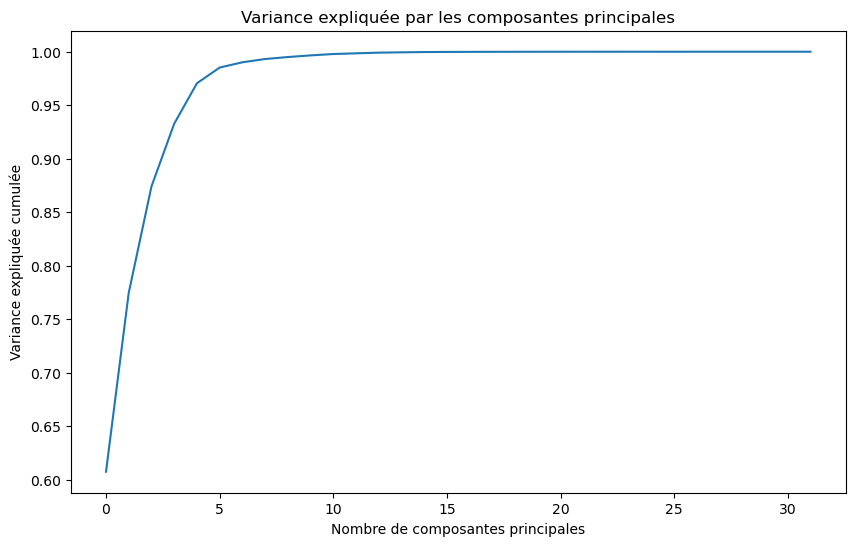

In [92]:
# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {pca_projection.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 1000 points pour le calcul des distances
if pca_projection.shape[0] > sample_size:
    indices = np.random.choice(pca_projection.shape[0], size=sample_size, replace=False)
    sampled_data = pca_projection[indices]
else:
    sampled_data = pca_projection

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')

# Étape 4 : Visualiser la distribution des distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des distances pair-à-pair (Euclidean)")
plt.xlabel("Distance")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 5 : Vérifier l'écart type et la moyenne
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print(f"Moyenne des distances : {mean_distance:.4f}")
print(f"Écart type des distances : {std_distance:.4f}")



# Variance expliquée cumulative
all_pca = PCA()
all_pca.fit(mu_embeddings_normalized)
print("Valeurs propres :", all_pca.explained_variance_)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(all_pca.explained_variance_ratio_))
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée par les composantes principales")
plt.show()

## We check the histogram of euclidian distances after UMAP

Shape des données : (49125, 3)


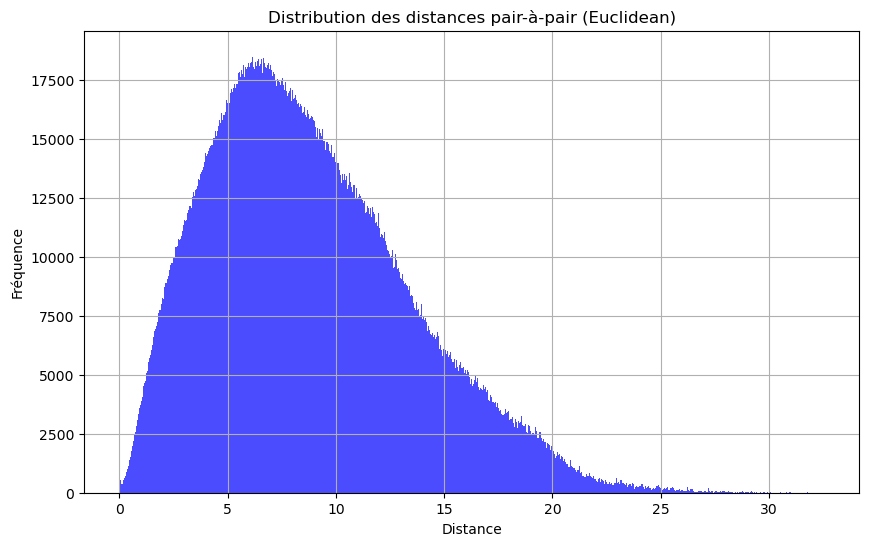

Moyenne des distances : 8.8136
Écart type des distances : 4.6781


In [93]:

# Étape 1 : Charger les données (128 dimensions)
# Supposons que `mu_embeddings` est ton tableau de données (N, 128)
print(f"Shape des données : {projection.shape}")

# Étape 2 : Prendre un échantillon si les données sont trop grandes
sample_size = 10000  # Limiter à 1000 points pour le calcul des distances
if projection.shape[0] > sample_size:
    indices = np.random.choice(projection.shape[0], size=sample_size, replace=False)
    sampled_data = projection[indices]
else:
    sampled_data = projection

# Étape 3 : Calculer toutes les paires de distances (euclidiennes)
distances = pdist(sampled_data, metric='euclidean')

# Étape 4 : Visualiser la distribution des distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=8000, color='blue', alpha=0.7)
plt.title("Distribution des distances pair-à-pair (Euclidean)")
plt.xlabel("Distance")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Étape 5 : Vérifier l'écart type et la moyenne
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print(f"Moyenne des distances : {mean_distance:.4f}")
print(f"Écart type des distances : {std_distance:.4f}")

## Clustering with KMedoids before dim reduction

In [94]:
from sklearn_extra.cluster import KMedoids
kmedoids_before = KMedoids(n_clusters=n_clusters, metric="euclidean", random_state=0)
kmedoids_before.fit(mu_embeddings_normalized)

centroids_kmedoids_before = kmedoids_before.cluster_centers_
labels_kmedoids_before = kmedoids_before.labels_


In [95]:
index_of_medoids = kmedoids_before.medoid_indices_
corresponding_medioid_embedding_space = mu_embeddings[index_of_medoids]
print(corresponding_medioid_embedding_space.shape)

(20, 32)


In [96]:
#Prepare the data for the csv
corresponding_medioid_embedding_space_csv = pd.DataFrame(corresponding_medioid_embedding_space, columns=[f"dim_{i}" for i in range(1,corresponding_medioid_embedding_space.shape[1] + 1)])
corresponding_medioid_embedding_space_csv["Method"] = "KMedoids_{i}_clusters".format(i=n_clusters)
corresponding_medioid_embedding_space_csv["index_in_embedding_space"] = index_of_medoids
corresponding_medioid_embedding_space_csv.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_25,dim_26,dim_27,dim_28,dim_29,dim_30,dim_31,dim_32,Method,index_in_embedding_space
0,-0.000385,-0.000258,-0.000079,0.002138,-0.000577,0.000630,0.000244,-0.001734,0.001211,-0.000946,...,0.000324,0.001288,-0.000138,0.000354,0.001016,0.001609,0.000426,-0.001562,KMedoids_20_clusters,47754
1,0.000095,0.000625,0.000851,0.000422,-0.001519,0.000368,-0.000273,-0.000482,0.001390,-0.000291,...,0.000135,0.001644,-0.000420,0.001151,0.001660,0.001770,-0.000569,-0.000818,KMedoids_20_clusters,15719
2,0.000470,0.000650,0.001115,-0.000554,-0.001670,-0.000139,0.000642,-0.000605,0.001375,-0.000098,...,-0.000111,0.001366,-0.000438,0.000969,0.002213,0.001624,-0.000672,-0.000254,KMedoids_20_clusters,18478
3,0.000035,0.000228,0.000556,0.000784,-0.001317,0.000164,0.000122,-0.001031,0.001165,-0.000491,...,0.000010,0.001458,-0.000259,0.000672,0.001730,0.001491,-0.000282,-0.000891,KMedoids_20_clusters,37555
4,0.000497,0.000087,-0.000238,0.000946,-0.000582,0.000340,0.000895,-0.000845,0.001368,0.000035,...,-0.000281,0.001611,0.000116,0.001086,0.001717,0.001195,0.000091,-0.000892,KMedoids_20_clusters,12277


In [97]:
#Export results to csv

corresponding_medioid_embedding_space_csv.to_csv(".\embeddings\medioids.csv", index=False)


## Vizualization with UMAP 3D

In [98]:
# Get back the orginal points of the centroïds
index_of_medoids = kmedoids_before.medoid_indices_

#Check that foudnback existing points with medoids indixes
print(np.unique(kmedoids_before.cluster_centers_ - mu_embeddings_normalized[index_of_medoids]))

[0.]


In [99]:
# Silhouette Score
silhouette_avg = silhouette_score(mu_embeddings_normalized, labels_kmedoids_before)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.13382713


In [100]:
#Find back the medoids in the UMAP space


centroids_kmedoids_before_projected = projection[index_of_medoids]

#Check that if we project afterwards, we have the same
print(reducer.transform(centroids_kmedoids_before)[0:7])
print(centroids_kmedoids_before_projected[0:7])

Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
[[-4.7098737   7.099081    9.663165  ]
 [ 2.9093368   7.2826343   5.02636   ]
 [ 1.1478124   2.0962365   1.6655445 ]
 [-0.20870326  8.728357    3.8433478 ]
 [ 0.5729461  -3.1700182   3.3659518 ]
 [-1.1473074   8.341544    7.1815624 ]
 [ 2.4302776   6.131576    6.0014634 ]]
[[-4.727043    7.136347    9.692348  ]
 [ 2.9413779   7.309375    5.0679517 ]
 [ 1.1849028   2.0800638   1.7130533 ]
 [-0.21295074  8.651327    3.8413117 ]
 [ 0.59886575 -3.1571834   3.386288  ]
 [-1.1339598   8.30302     7.1826286 ]
 [ 2.3187363   6.0682483   6.077815  ]]


In [101]:
for i in range(n_clusters):
    print(centroids_kmedoids_before_projected[i, 0], centroids_kmedoids_before_projected[i, 1], centroids_kmedoids_before_projected[i, 2])

-4.727043 7.136347 9.692348
2.9413779 7.309375 5.0679517
1.1849028 2.0800638 1.7130533
-0.21295074 8.651327 3.8413117
0.59886575 -3.1571834 3.386288
-1.1339598 8.30302 7.1826286
2.3187363 6.0682483 6.077815
-3.8052652 9.067188 6.5546265
-0.17623402 7.026199 10.607966
-4.1484585 -3.4982052 1.8912061
0.4352026 8.0667095 7.3643513
-1.6384548 8.583017 2.788239
15.007212 10.85905 8.791214
2.9553053 7.0405536 6.2886457
6.110437 8.777671 3.1226425
1.0556958 5.9354534 1.9379776
4.228961 3.4578106 4.72578
-3.8493035 5.4601097 12.064212
-8.800158 2.1116586 4.618408
-0.39943093 7.8056827 5.1734176


In [102]:
centroids_kmedoids_before_projected[:, 0], centroids_kmedoids_before_projected[:, 1], centroids_kmedoids_before_projected[:, 2]

(array([-4.727043  ,  2.9413779 ,  1.1849028 , -0.21295074,  0.59886575,
        -1.1339598 ,  2.3187363 , -3.8052652 , -0.17623402, -4.1484585 ,
         0.4352026 , -1.6384548 , 15.007212  ,  2.9553053 ,  6.110437  ,
         1.0556958 ,  4.228961  , -3.8493035 , -8.800158  , -0.39943093],
       dtype=float32),
 array([ 7.136347 ,  7.309375 ,  2.0800638,  8.651327 , -3.1571834,
         8.30302  ,  6.0682483,  9.067188 ,  7.026199 , -3.4982052,
         8.0667095,  8.583017 , 10.85905  ,  7.0405536,  8.777671 ,
         5.9354534,  3.4578106,  5.4601097,  2.1116586,  7.8056827],
       dtype=float32),
 array([ 9.692348 ,  5.0679517,  1.7130533,  3.8413117,  3.386288 ,
         7.1826286,  6.077815 ,  6.5546265, 10.607966 ,  1.8912061,
         7.3643513,  2.788239 ,  8.791214 ,  6.2886457,  3.1226425,
         1.9379776,  4.72578  , 12.064212 ,  4.618408 ,  5.1734176],
       dtype=float32))

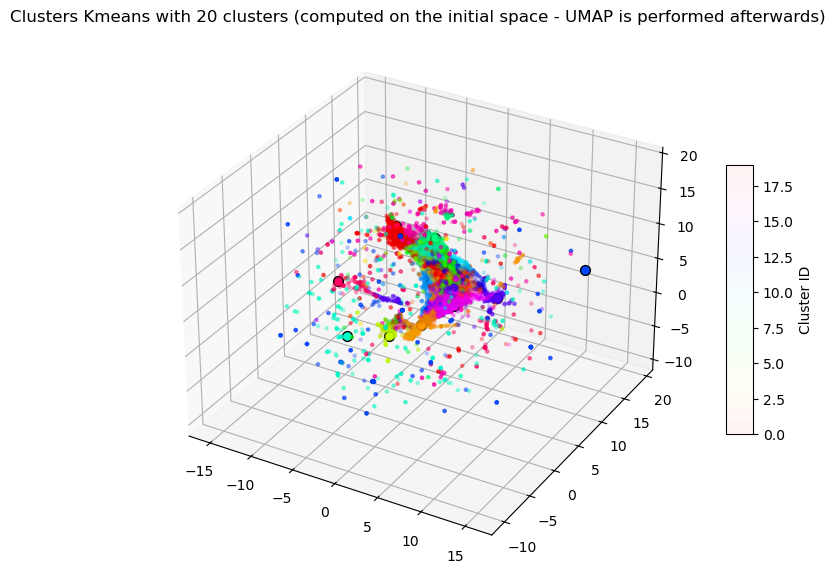

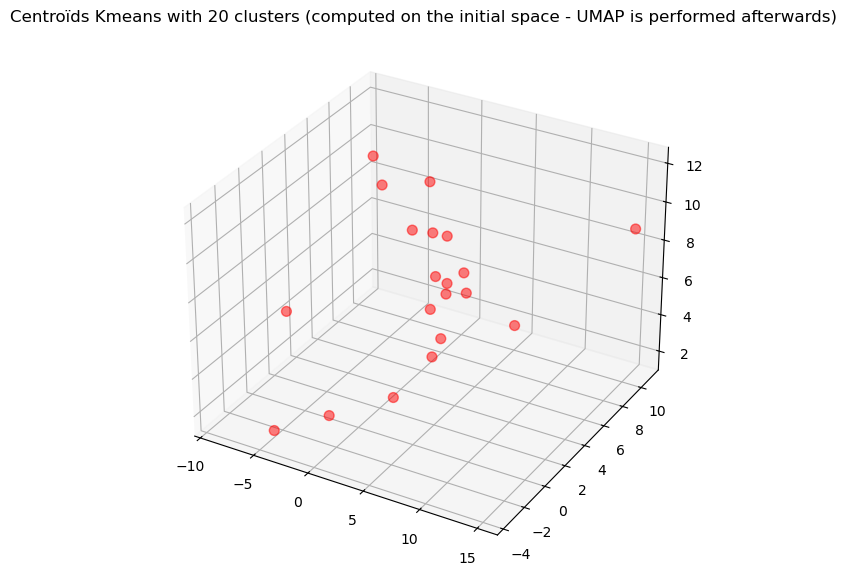

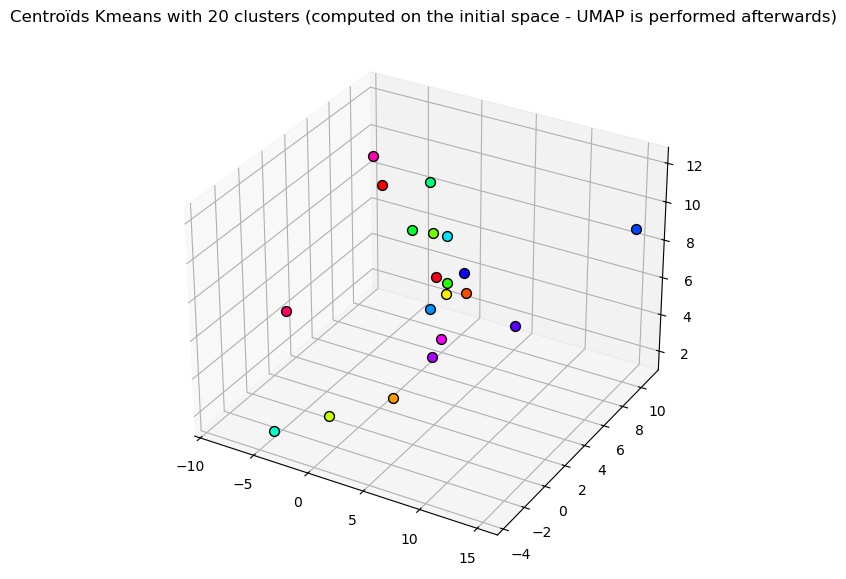

In [103]:
#We plot the results

# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_clusters  = ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c=labels_kmedoids_before, s=5, cmap=custom_cmap, alpha = 0.04)
for i in range(n_clusters):
    ax.scatter(centroids_kmedoids_before_projected[i, 0], centroids_kmedoids_before_projected[i, 1], centroids_kmedoids_before_projected[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centroids_kmedoids_before_projected[:, 0], centroids_kmedoids_before_projected[:, 1], centroids_kmedoids_before_projected[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter(centroids_kmedoids_before_projected[i, 0], centroids_kmedoids_before_projected[i, 1], centroids_kmedoids_before_projected[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")


plt.show()


## UMAP 2D

In [104]:
#Find back the medoids in the UMAP space (2D)


centroids_kmedoids_before_projected_2D = projection_2D[index_of_medoids]

#Check that if we project afterwards, we have the same
print(reducer_2D.transform(centroids_kmedoids_before)[0:7])
print(centroids_kmedoids_before_projected_2D[0:7])

Thu Nov 21 03:45:12 2024 Worst tree score: 0.85508397
Thu Nov 21 03:45:12 2024 Mean tree score: 0.86060560
Thu Nov 21 03:45:12 2024 Best tree score: 0.87554198
Thu Nov 21 03:45:12 2024 Forward diversification reduced edges from 736875 to 355827
Thu Nov 21 03:45:12 2024 Reverse diversification reduced edges from 355827 to 355827
Thu Nov 21 03:45:13 2024 Degree pruning reduced edges from 387234 to 386855
Thu Nov 21 03:45:13 2024 Resorting data and graph based on tree order
Thu Nov 21 03:45:13 2024 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
[[ 3.1576045 13.442528 ]
 [ 4.9405475  4.7808285]
 [-0.9445083  5.097569 ]
 [ 1.8382082  9.912365 ]
 [ 7.9771895 -0.6398632]
 [-2.2539277  7.722818 ]
 [ 3.8941376  3.7074132]]
[[ 3.164262  13.427156 ]
 [ 4.9186745  4.757217 ]
 [-0.9568412  5.0243163]
 [ 1.8807126  9.87657  ]
 [ 7.972363  -0.6100187]
 [-2.2622514  7.7257195]
 [ 3.7901983  3.6863017]]


In [105]:
# Vérification de l'ordre des labels et des centroïdes
unique_labels = sorted(set(labels_kmedoids_before))
expected_labels = list(range(n_clusters))

if unique_labels == expected_labels:
    print("✅ Les labels des clusters correspondent aux indices des centroïdes.")
else:
    print("❌ Les labels des clusters ne correspondent pas aux indices des centroïdes.")
    print(f"Labels trouvés : {unique_labels}")
    print(f"Labels attendus : {expected_labels}")


✅ Les labels des clusters correspondent aux indices des centroïdes.


C:\Users\antoi\AppData\Local\Temp\ipykernel_18008\583982661.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids_kmedoids_before_projected_2D[i, 0], centroids_kmedoids_before_projected_2D[i, 1],


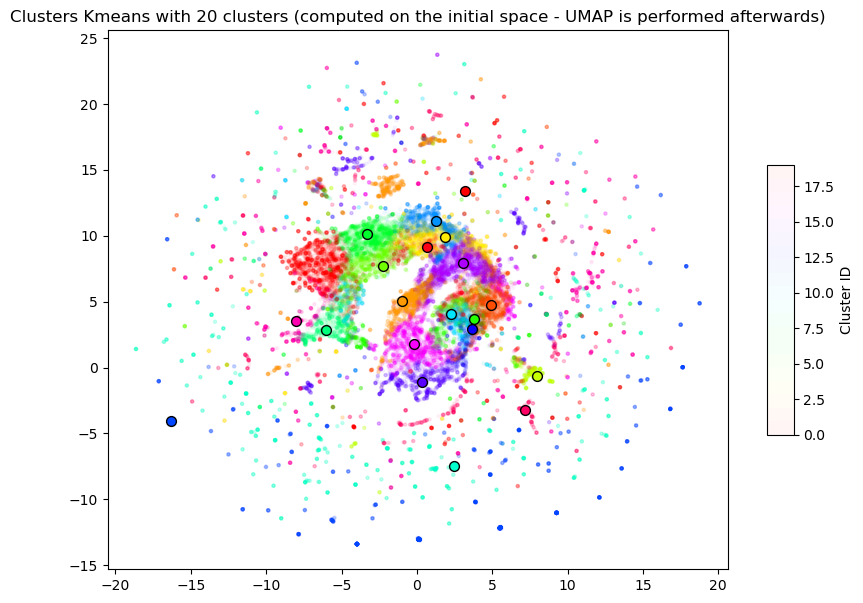

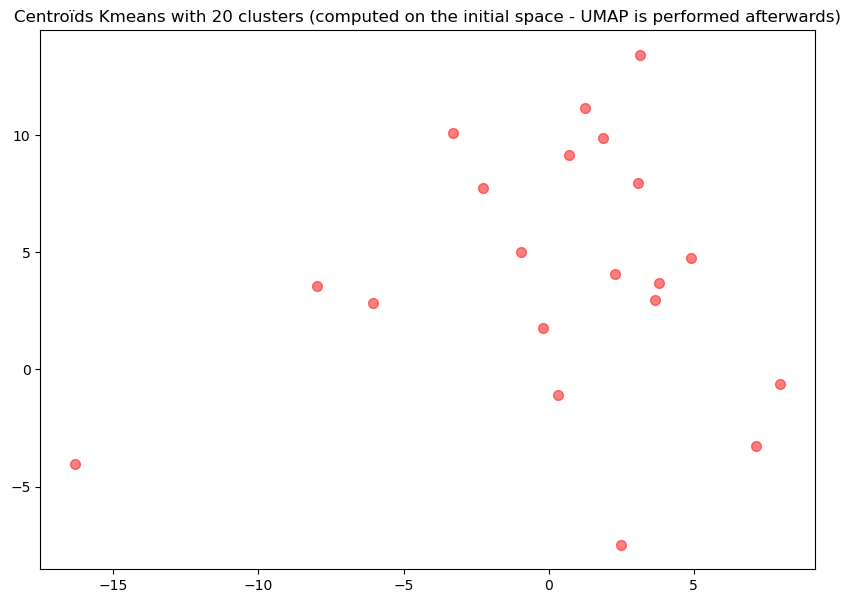

In [106]:
#We plot the results


# Visualiser les clusters and centroids
fig, ax = plt.subplots(figsize=(10, 7))

scatter_clusters  = ax.scatter(projection_2D[:, 0], projection_2D[:, 1], c=labels_kmedoids_before, s=5, cmap=custom_cmap, alpha = 0.04)
for i in range(n_clusters):
    ax.scatter(centroids_kmedoids_before_projected_2D[i, 0], centroids_kmedoids_before_projected_2D[i, 1], 
               c=colors_2D[i], s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")



fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(centroids_kmedoids_before_projected_2D[:, 0], centroids_kmedoids_before_projected_2D[:, 1], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")
plt.show()

## PCA (3D)

In [107]:
#Project the centroids in the PCA space 3D
centroids_kmedoids_before_projected_PCA = pca_projection[index_of_medoids]

In [108]:
centroids_kmedoids_before_projected_PCA

array([[-3.2050858 , -2.114642  , -1.637084  ],
       [-0.7541281 ,  0.37981415,  0.74938965],
       [-1.1629109 ,  2.6028883 ,  1.2590902 ],
       [-2.0451078 ,  0.45632404,  0.33295926],
       [-2.9007943 ,  0.77668595, -1.462904  ],
       [-1.7145914 , -0.77623266, -0.1570745 ],
       [-0.78577393,  0.4632551 ,  0.5801563 ],
       [-3.147755  , -0.45806533, -0.6579607 ],
       [-0.7052625 , -1.9263242 , -0.10144376],
       [13.099217  , -3.0215032 ,  1.6638184 ],
       [-1.0298793 , -1.0455282 ,  0.34246203],
       [-2.7105403 ,  1.1456096 ,  0.23040903],
       [11.37488   ,  2.025075  , -3.7880433 ],
       [-0.09299329, -0.25003636,  0.5971467 ],
       [ 1.1641707 ,  1.4962118 ,  1.9863359 ],
       [-1.6594808 ,  1.502762  ,  0.8009775 ],
       [-0.39422655,  1.4421088 ,  1.4627101 ],
       [-2.618339  , -4.228095  , -1.6144431 ],
       [ 4.9407945 ,  0.16718556,  2.050452  ],
       [-1.5864309 ,  0.22577336, -0.16796404]], dtype=float32)

In [109]:
centroids_kmedoids_before_projected_PCA[:,0]

array([-3.2050858 , -0.7541281 , -1.1629109 , -2.0451078 , -2.9007943 ,
       -1.7145914 , -0.78577393, -3.147755  , -0.7052625 , 13.099217  ,
       -1.0298793 , -2.7105403 , 11.37488   , -0.09299329,  1.1641707 ,
       -1.6594808 , -0.39422655, -2.618339  ,  4.9407945 , -1.5864309 ],
      dtype=float32)

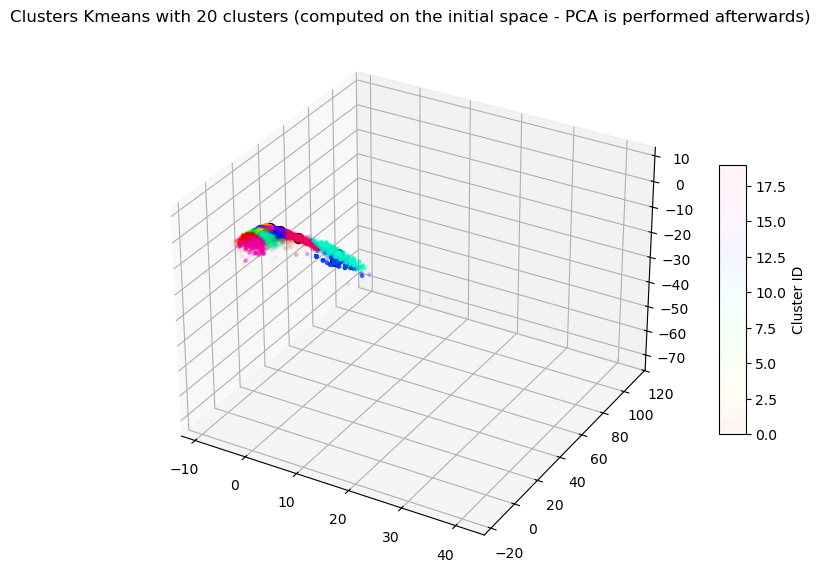

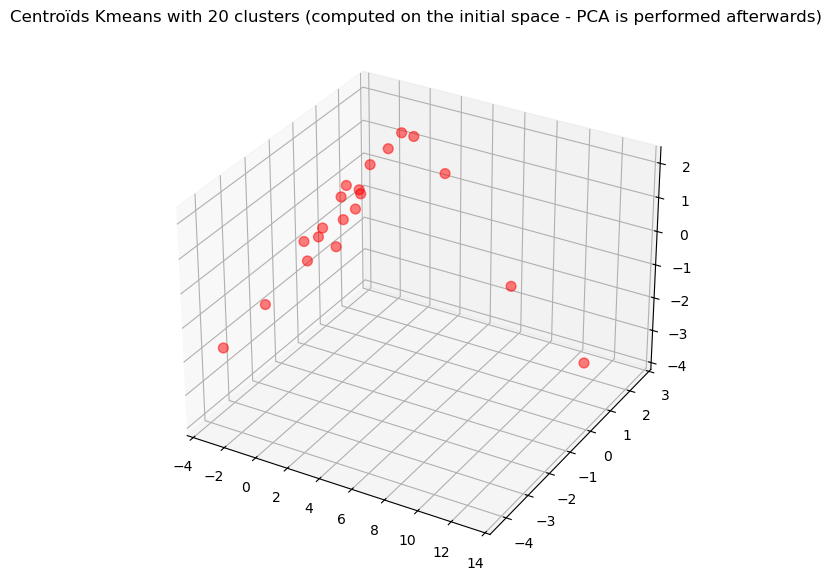

In [110]:
#We plot the results

# Visualiser les clusters and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter(centroids_kmedoids_before_projected_PCA[i, 0], centroids_kmedoids_before_projected_PCA[i, 1], centroids_kmedoids_before_projected_PCA[i, 2], 
               c=colors[i].reshape(1, -1), s=50, edgecolor='black', label=f'Centroid {i}')
    
scatter_clusters  = ax.scatter(pca_projection[:, 0], pca_projection[:, 1], pca_projection[:, 2], c=labels_kmedoids_before, s=5, cmap=custom_cmap, alpha = 0.04)
   


cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - PCA is performed afterwards)")



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids_kmedoids_before_projected_PCA[:, 0], centroids_kmedoids_before_projected_PCA[:, 1], centroids_kmedoids_before_projected_PCA[:, 2], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - PCA is performed afterwards)")
plt.show()


## PCA 2D

In [111]:
#Project the centroids in the PCA space 2D

centroids_kmedoids_before_projected_PCA_2D = pca_projection_2d[index_of_medoids]

C:\Users\antoi\AppData\Local\Temp\ipykernel_18008\4230644511.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids_kmedoids_before_projected_PCA_2D[i, 0], centroids_kmedoids_before_projected_PCA_2D[i, 1],


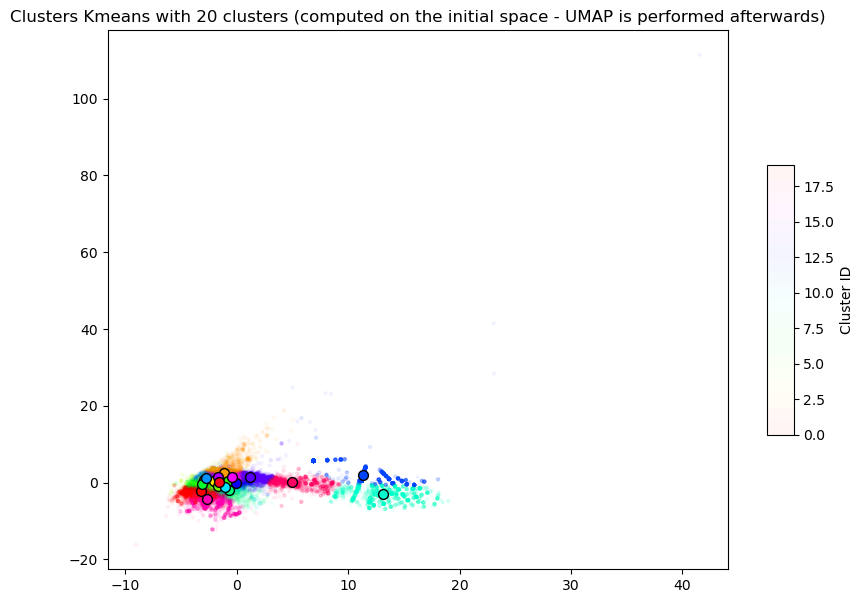

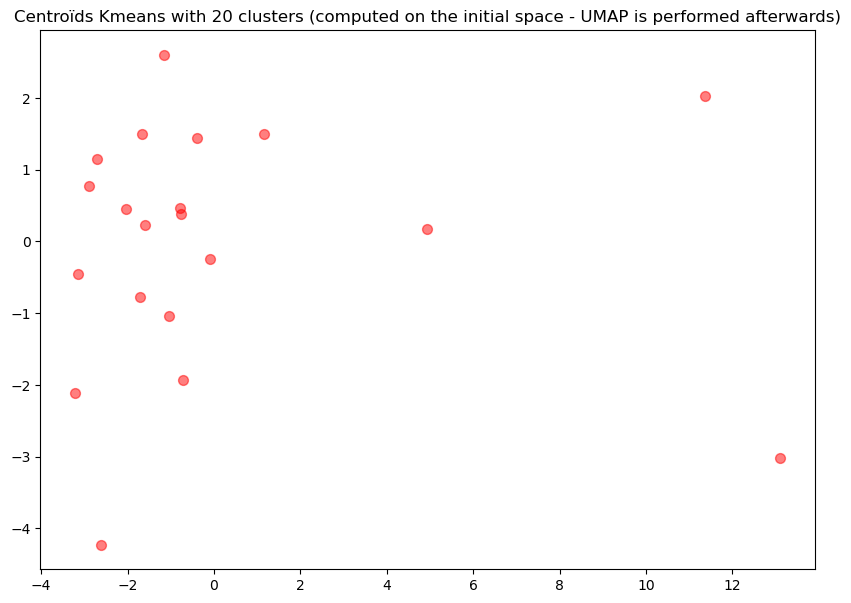

In [112]:
#We plot the results
colors_2D = custom_cmap.colors if hasattr(custom_cmap, "colors") else plt.cm.hsv(np.linspace(0, 1, n_clusters))

# Visualiser les clusters and centroids
fig, ax = plt.subplots(figsize=(10, 7))

scatter_clusters  = ax.scatter(pca_projection_2d[:, 0], pca_projection_2d[:, 1], c=labels_kmedoids_before, s=5, cmap=custom_cmap, alpha = 0.04)
for i in range(n_clusters):
    ax.scatter(centroids_kmedoids_before_projected_PCA_2D[i, 0], centroids_kmedoids_before_projected_PCA_2D[i, 1], 
               c=colors_2D[i], s=50, edgecolor='black', label=f'Centroid {i}')



cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")



fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(centroids_kmedoids_before_projected_PCA_2D[:, 0], centroids_kmedoids_before_projected_PCA_2D[:, 1], c='red', s=50, alpha=0.5)
plt.title(f"Centroïds Kmeans with {n_clusters} clusters (computed on the initial space - UMAP is performed afterwards)")
plt.show()

# HDBSCAN

In [113]:
import hdbscan

#with 20 20 too many clusters 394
# with 30, 20, a large cluster in the center with all points
# HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=5, metric="euclidean")
hdbscan_clusterer.fit(mu_embeddings_normalized)

labels_hdbscan = hdbscan_clusterer.labels_


In [114]:
from collections import Counter

# Comptage des points par cluster
cluster_counts = Counter(labels_hdbscan)
print("Nombre de points par cluster :", cluster_counts)

Nombre de points par cluster : Counter({-1: 24886, 130: 16294, 37: 374, 2: 326, 65: 236, 81: 165, 123: 149, 63: 137, 1: 136, 78: 133, 88: 117, 38: 109, 74: 108, 71: 105, 116: 103, 94: 91, 13: 89, 109: 88, 86: 87, 4: 86, 50: 85, 26: 84, 84: 80, 48: 78, 31: 78, 3: 73, 113: 73, 17: 72, 16: 72, 10: 71, 98: 71, 60: 70, 77: 69, 8: 69, 28: 66, 105: 66, 101: 66, 33: 66, 41: 66, 111: 61, 18: 61, 25: 59, 70: 58, 53: 58, 87: 58, 36: 57, 99: 56, 89: 56, 12: 55, 117: 55, 47: 55, 107: 55, 124: 55, 126: 55, 85: 53, 7: 53, 45: 53, 75: 53, 64: 53, 110: 53, 6: 52, 121: 52, 103: 51, 93: 51, 96: 50, 29: 50, 128: 49, 32: 49, 114: 49, 51: 48, 95: 47, 68: 46, 44: 46, 73: 45, 106: 45, 22: 45, 108: 45, 67: 44, 5: 44, 72: 44, 52: 42, 100: 42, 11: 42, 43: 42, 49: 41, 23: 41, 55: 39, 54: 39, 79: 39, 20: 38, 119: 38, 102: 37, 97: 37, 15: 37, 92: 37, 62: 36, 115: 36, 104: 35, 83: 35, 35: 35, 58: 35, 40: 35, 9: 35, 82: 35, 91: 35, 90: 34, 21: 34, 27: 34, 80: 34, 76: 34, 112: 34, 69: 34, 129: 33, 46: 33, 14: 33, 125:

In [115]:
mu_embeddings_normalized.shape

(49125, 32)

In [116]:
indices_centroids_hdbscan = []
# Trouver les centroïdes (médiane des points dans chaque cluster)
centroids_hdbscan = []
unique_labels_hdbscan = set(labels_hdbscan) - {-1}  # Exclure le bruit
for label in unique_labels_hdbscan:
    cluster_points = mu_embeddings_normalized[labels_hdbscan == label]
    cluster_indices = np.where(labels_hdbscan == label)[0]
    centroid = np.median(cluster_points, axis=0)  
    centroids_hdbscan.append(centroid)

    closest_point_idx = np.argmin(np.sum(np.abs(cluster_points - centroid), axis=1))
    indices_centroids_hdbscan.append(cluster_indices[closest_point_idx])  # Ajouter l'indice global


centroids_hdbscan = np.array(centroids_hdbscan)  # Conversion en tableau numpy
print(f"Nombre de clusters : {len(centroids_hdbscan)}")

Nombre de clusters : 131


In [117]:
centroid_projected = projection[indices_centroids_hdbscan]

In [118]:
centroid_projected

array([[ 12.526257  ,   6.1953926 ,   5.1082864 ],
       [  5.569774  ,  -8.570168  ,  12.351492  ],
       [  2.2921002 ,  -3.5700376 ,  18.139635  ],
       [ -8.910382  ,   2.435998  ,  18.72229   ],
       [-12.224222  ,  -1.5876015 ,  13.763803  ],
       [ -2.1520123 ,  -5.8741918 ,   2.1965482 ],
       [  8.551565  ,  -1.3354894 ,  13.375585  ],
       [-10.361717  ,  -3.4011557 ,   0.4871822 ],
       [  0.87490463,  -6.1118307 ,  -2.8219404 ],
       [ 10.148523  ,  17.007092  ,   6.1207533 ],
       [-15.331775  ,   4.541409  ,   1.6023299 ],
       [ 11.835622  ,  -1.0039257 ,  -3.356281  ],
       [  9.014852  ,  -5.396357  ,   9.985122  ],
       [ -1.7725408 ,  13.970993  ,  -0.63228506],
       [-10.771449  ,   6.606367  ,   1.4135264 ],
       [ -8.919357  ,   5.953284  ,   9.0141735 ],
       [  6.845809  ,  11.049079  ,  12.782774  ],
       [ -0.8573332 ,  11.348142  ,  11.698561  ],
       [  4.497698  ,   2.0616686 ,  12.94936   ],
       [  5.444535  ,  12.95160

In [119]:
centroid_projected[:,0]

array([ 12.526257  ,   5.569774  ,   2.2921002 ,  -8.910382  ,
       -12.224222  ,  -2.1520123 ,   8.551565  , -10.361717  ,
         0.87490463,  10.148523  , -15.331775  ,  11.835622  ,
         9.014852  ,  -1.7725408 , -10.771449  ,  -8.919357  ,
         6.845809  ,  -0.8573332 ,   4.497698  ,   5.444535  ,
        -2.6216915 ,  15.007212  ,  -8.596712  ,  -3.2124476 ,
         6.906436  ,   2.3141894 ,  10.5545225 ,  10.987828  ,
         7.89792   ,  -2.2817535 ,  -0.4283139 ,   8.973385  ,
         3.5771425 ,  -7.0297694 ,  -1.3185558 ,   4.536425  ,
        -3.8893495 ,   3.2089052 ,  15.318308  ,   4.3365574 ,
        -4.7422748 ,  -0.797849  ,   0.606447  ,   4.734973  ,
        -3.0492787 ,  -3.3911767 ,  -2.1906593 ,  -2.0889645 ,
         8.501226  ,  -4.720856  ,  -4.700524  ,  -4.453311  ,
        -7.6289825 ,  -2.582126  ,   8.501464  ,   2.8441706 ,
       -11.177564  ,  -4.7114496 ,   4.147044  ,   2.5395794 ,
        -0.08400568,  -0.8319448 ,   1.7431675 ,  -4.07

C:\Users\antoi\AppData\Local\Temp\ipykernel_18008\3205615327.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(np.unique(labels_hdbscan)))  # Palette de couleurs distinctes


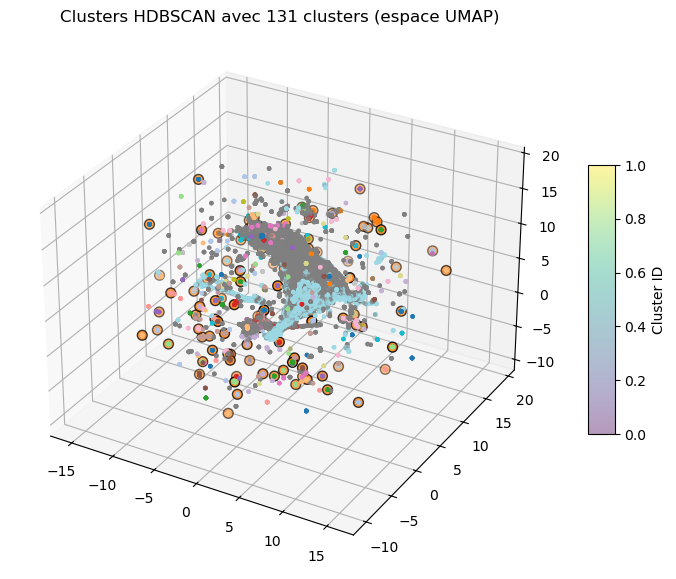

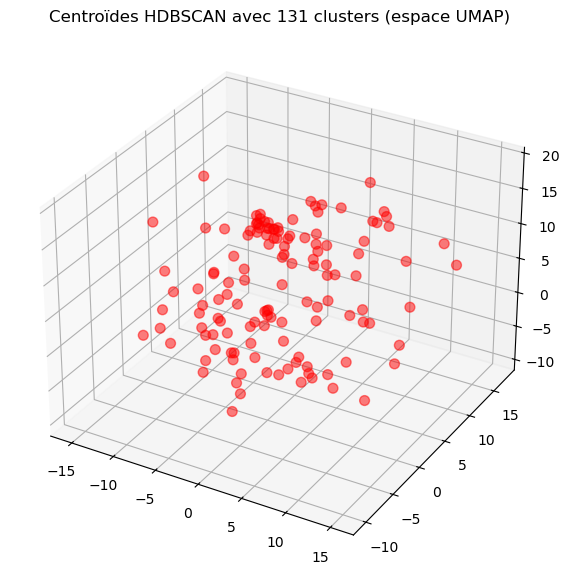

In [120]:
n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)  # Exclure le bruit (-1)

# Création d'une palette de couleurs pour les clusters
colors = plt.cm.get_cmap("tab20", len(np.unique(labels_hdbscan)))  # Palette de couleurs distinctes

# Visualisation des clusters avec points de bruit en gris
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Points des clusters
scatter_clusters = ax.scatter(
    projection[:, 0], projection[:, 1], projection[:, 2],
    c=[colors(label) if label != -1 else (0.5, 0.5, 0.5, 0.1) for label in labels_hdbscan],  # Bruit en gris
    s=5, alpha=0.4
)

# Centroïdes des clusters

ax.scatter(centroid_projected[:,0], centroid_projected[:,1], centroid_projected[:,2],
        c=[colors(i)], s=50, edgecolor='black', label=f'Centroid {i}', zorder = 3)

# Colorbar et titre
cbar = plt.colorbar(scatter_clusters, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Cluster ID")
plt.title(f"Clusters HDBSCAN avec {n_clusters_hdbscan} clusters (espace UMAP)")

# Visualisation des centroïdes uniquement
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    centroid_projected[:,0],
    centroid_projected[:,1],
    centroid_projected[:,2],
    c='red', s=50, alpha=0.5
)
plt.title(f"Centroïdes HDBSCAN avec {n_clusters_hdbscan} clusters (espace UMAP)")
plt.show()